<a href="https://colab.research.google.com/github/mlyhoops/Stock-Journal/blob/main/Stock_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock Journal Practice
This Jupyter Notebook will have everything that I am experimenting with. If you would like to see the cleaned up layout, click the [link to visit the main journal](https://github.com/mlyhoops/Stock-Journal/blob/main/Stock_Journal.ipynb). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

url='https://drive.google.com/file/d/1Ii2EUxFUQ0MOX81410Y0b1aZ-YIdgXwk/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

optionTrades = pd.read_csv(url)

In [2]:
optionTrades.head()

,Name,Symbol,Side,Status,Filled,Total Qty,Price,Avg Price,Time-in-Force,Placed Time,Filled Time
0,SPY 09/30/2022 00:00:00 EDT Call $364.00,SPY220930C00364000,Sell,Filled,4,4,@2.02,2.02,DAY,09/30/2022 10:34:59 EDT,09/30/2022 10:35:01 EDT
1,SPY 09/30/2022 00:00:00 EDT Call $364.00,SPY220930C00364000,Buy,Filled,4,4,@1.90,1.90,DAY,09/30/2022 09:55:47 EDT,09/30/2022 09:55:47 EDT
2,SPY 09/28/2022 00:00:00 EDT Put $353.00,SPY220928P00353000,Sell,Filled,1,1,@0.270,0.27,DAY,09/27/2022 15:02:41 EDT,09/27/2022 15:06:43 EDT
3,SPY 09/28/2022 00:00:00 EDT Put $353.00,SPY220928P00353000,Buy,Filled,1,1,@0.230,0.23,DAY,09/27/2022 14:55:20 EDT,09/27/2022 14:55:21 EDT
4,SPY 09/23/2022 00:00:00 EDT Call $371.00,SPY 09/23/2022 00:00:00 EDT Call $371.00,Sell,Filled,1,1,@0.220,0.22,DAY,09/23/2022 12:55:33 EDT,09/23/2022 12:55:34 EDT


In [3]:
df = optionTrades[["Name"]]
df["Ticker"] = df["Name"].str.split(' ').str[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
print(df["Ticker"].unique())

['SPY' 'QQQ' 'SOFI' 'AMD' 'MSOS' 'MU' 'NVDA' 'GM' 'SNAP' 'UBER' 'AAL'
 'IBM' 'AAPL' 'MARA' 'BA' 'BABA' 'UPST' 'NIO' 'PLTR' 'ATOS' 'LTHM']


In [5]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [6]:
output_notebook()

In [7]:
p1 = figure(x_axis_type="linear", title="Avg Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(optionTrades.index, optionTrades['Avg Price'], color='#f2a900', legend="OptionPrice")

p1.legend.location = "top_left"

show(p1)

In [8]:
optionTrades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           379 non-null    object 
 1   Symbol         379 non-null    object 
 2   Side           379 non-null    object 
 3   Status         379 non-null    object 
 4   Filled         379 non-null    int64  
 5   Total Qty      379 non-null    int64  
 6   Price          379 non-null    object 
 7   Avg Price      351 non-null    float64
 8   Time-in-Force  379 non-null    object 
 9   Placed Time    379 non-null    object 
 10  Filled Time    351 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 32.7+ KB


In [9]:
optionTrades.describe()

,Filled,Total Qty,Avg Price
count,379.000000,379.000000,351.000000
mean,21.783641,24.337731,3.273079
std,31.789580,32.991131,3.007128
min,0.000000,1.000000,0.020000
25%,2.000000,2.000000,1.040000
50%,7.000000,9.000000,2.580000
75%,30.000000,35.000000,4.435000
max,173.000000,173.000000,19.580000


In [10]:
optionTrades["Avg Price"].describe()

count    351.000000
mean       3.273079
std        3.007128
min        0.020000
25%        1.040000
50%        2.580000
75%        4.435000
max       19.580000
Name: Avg Price, dtype: float64

Text(0.5, 0, 'Price of Contract')

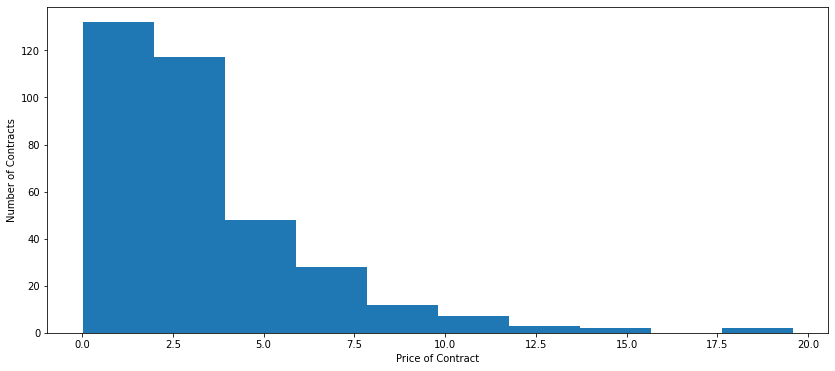

In [11]:
ax = optionTrades['Avg Price'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Contracts')
ax.set_xlabel('Price of Contract')

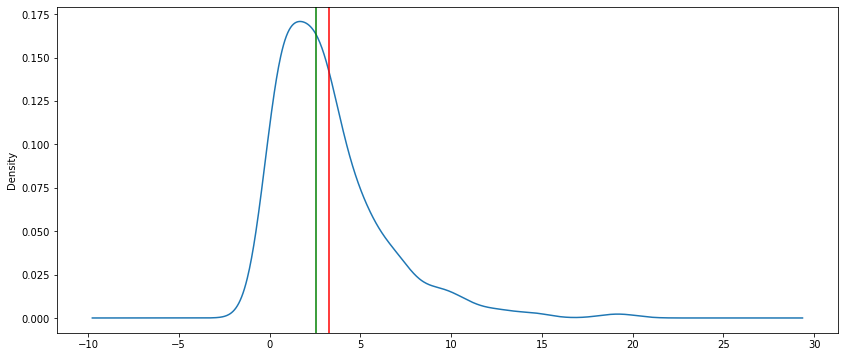

In [12]:
ax = optionTrades['Avg Price'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(optionTrades['Avg Price'].mean(), color='red')
ax.axvline(optionTrades['Avg Price'].median(), color='green')